In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [66]:
d_train = pd.read_csv(r'D:\Downloads\loan_train.csv')
d_test = pd.read_csv(r'D:\Downloads\loan_test.csv')
print(d_train.shape)
print(d_test.shape)
print(d_train.head())

(614, 13)
(367, 12)
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  


<Axes: xlabel='Loan_Status', ylabel='count'>

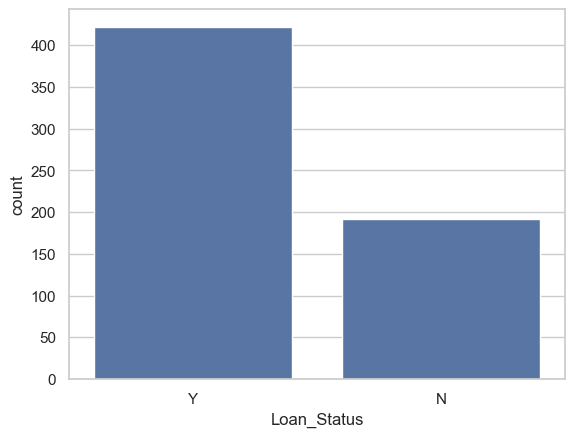

In [67]:
sns.countplot(x = 'Loan_Status' , data = d_train)

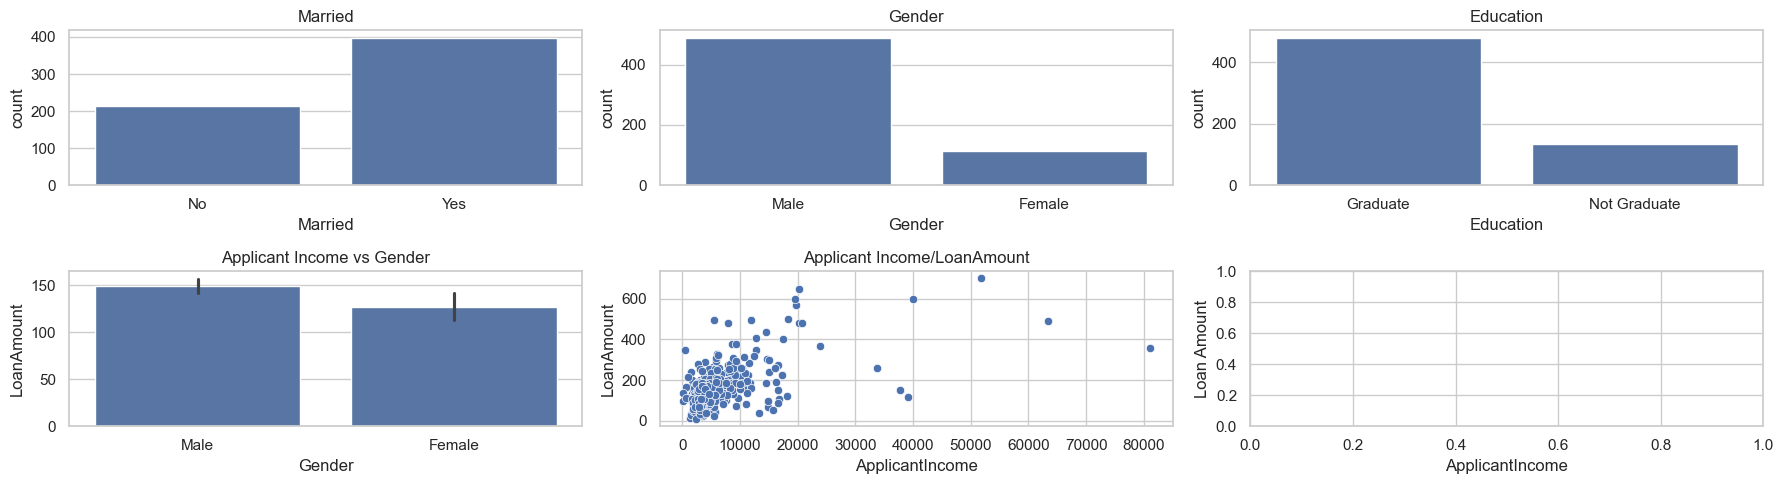

In [68]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 5))
# First subplot
sns.countplot(x='Married', data=d_train, ax=axes[0,0])
axes[0,0].set_title('Married')

# Second subplot
sns.countplot(x='Gender', data=d_train, ax=axes[0,1])
axes[0,1].set_title('Gender')

# Third subplot
sns.countplot(x='Education', data=d_train, ax=axes[0,2])
axes[0,2].set_title('Education')


sns.barplot(x= 'Gender', y = 'LoanAmount', data = d_train,ax=axes[1,0])
plt.xlabel('Gender')
plt.ylabel('Loan Amount')
axes[1,0].set_title('Applicant Income vs Gender')


sns.scatterplot(x= 'ApplicantIncome', y = 'LoanAmount', data = d_train,ax=axes[1,1])
plt.xlabel('ApplicantIncome')
plt.ylabel('Loan Amount')
axes[1,1].set_title('Applicant Income/LoanAmount')


# Show all plots
plt.tight_layout()
plt.show()


d_train.groupby('Education')['Loan_Status'].value_counts(normalize=True)
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=d_train)


In [69]:
d_train['TotalIncome'] = d_train['ApplicantIncome'] + d_train['CoapplicantIncome']
d_train['Income_Loan_Ratio'] = d_train['TotalIncome'] / d_train['LoanAmount']

print(d_train['Income_Loan_Ratio'])

0             NaN
1       47.585938
2       45.454545
3       41.175000
4       42.553191
          ...    
609     40.845070
610    102.650000
611     32.853755
612     40.550802
613     34.458647
Name: Income_Loan_Ratio, Length: 614, dtype: float64


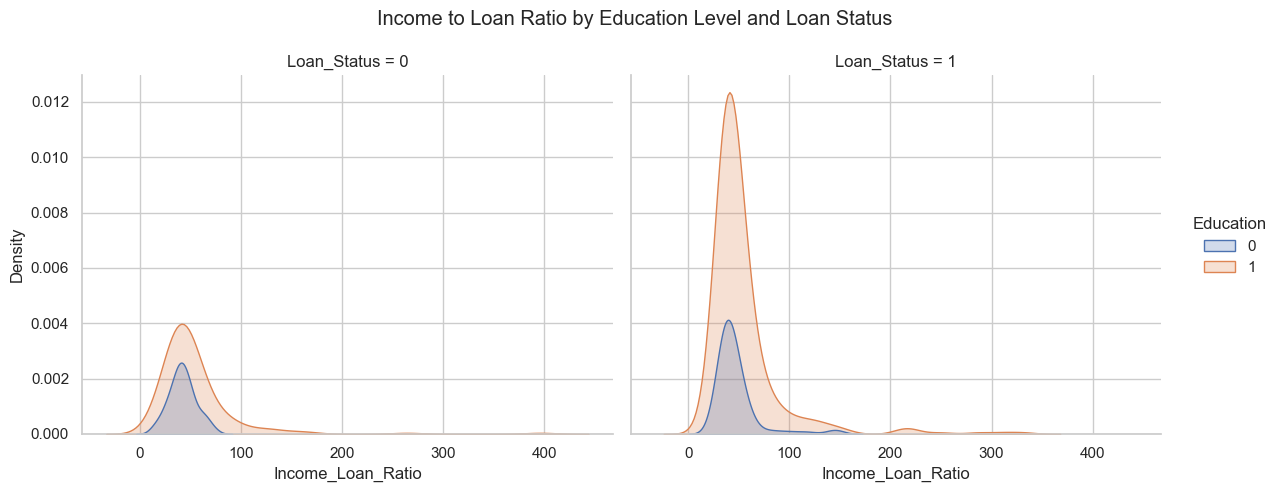

In [88]:

# Make sure the ratio is calculated
d_train['LoanAmount'] = d_train['LoanAmount'].fillna(d_train['LoanAmount'].median())
d_train['TotalIncome'] = d_train['ApplicantIncome'] + d_train['CoapplicantIncome']
d_train['Income_Loan_Ratio'] = (d_train['TotalIncome'] + 0.00000001) / (d_train['LoanAmount'] + 0.00000001)

# Plot: KDE of Income_Loan_Ratio by Education, split by Loan_Status
sns.displot(
    data=d_train,
    x='Income_Loan_Ratio',
    hue='Education',
    col='Loan_Status',
    kind='kde',
    fill=True,
    height=5,
    aspect=1.2
)

plt.subplots_adjust(top=0.85)
plt.suptitle('Income to Loan Ratio by Education Level and Loan Status')
plt.show()

In [71]:
d_train.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Income_Loan_Ratio
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,7024.705081,51.225813
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,6458.663872,37.916644
min,150.000000,0.000000,9.000000,12.00000,0.000000,1442.000000,12.090196
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,4166.000000,35.525718
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,5416.500000,41.426540
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,7521.750000,51.777440
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,81000.000000,396.366667


In [72]:
d_train.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalIncome           0
Income_Loan_Ratio    22
dtype: int64

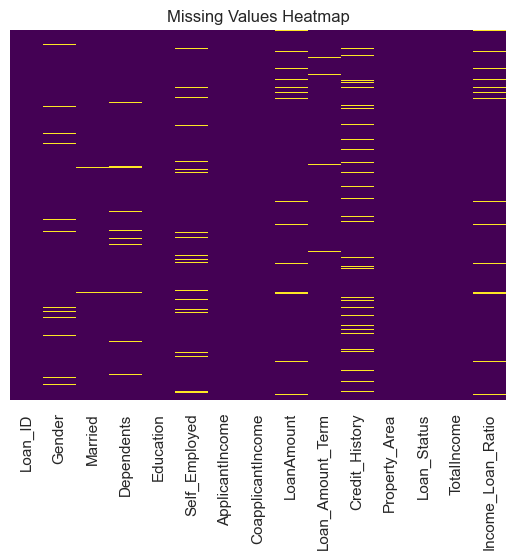

In [73]:
sns.heatmap(d_train.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [74]:
d_train['LoanAmount'] = d_train['LoanAmount'].fillna(d_train['LoanAmount'].median())
d_train['Credit_History'] = d_train['Credit_History'].fillna(d_train['Credit_History'].mode()[0])
d_train['Self_Employed'] = d_train['Self_Employed'].fillna('No')

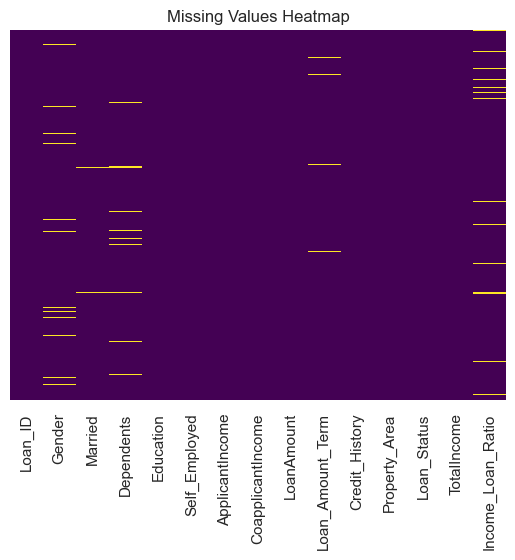

In [75]:
sns.heatmap(d_train.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

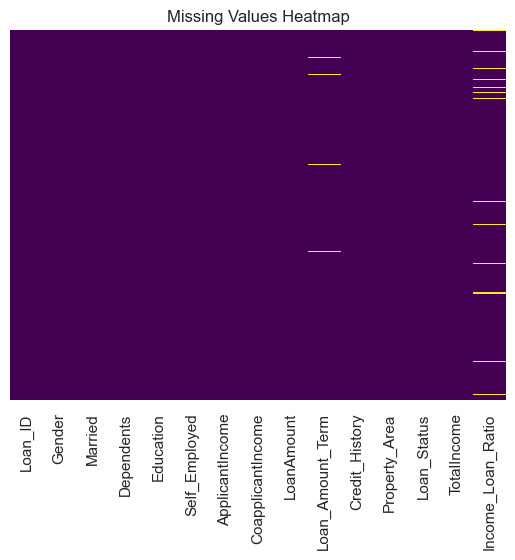

In [76]:
d_train['Gender'] = d_train['Gender'].fillna(d_train['Gender'].mode()[0])
d_train['Married'] = d_train['Married'].fillna(d_train['Married'].mode()[0])
d_train['Dependents'] = d_train['Dependents'].fillna(d_train['Dependents'].mode()[0])

sns.heatmap(d_train.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [77]:
# Calculate 99th percentile value
cap_value = d_train['ApplicantIncome'].quantile(0.99)

# Replace values greater than cap_value with cap_value
d_train.loc[d_train['ApplicantIncome'] > cap_value, 'ApplicantIncome'] =  cap_value.astype(d_train['ApplicantIncome'].dtype)

Q1 = d_train['LoanAmount'].quantile(0.25)
Q3 = d_train['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values below lower_bound and above upper_bound
d_train.loc[d_train['LoanAmount'] < lower_bound, 'LoanAmount'] = lower_bound
d_train.loc[d_train['LoanAmount'] > upper_bound, 'LoanAmount'] = upper_bound

In [78]:
print(d_train.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  TotalIncome  Income_Loan_Ratio  
0             1.0         Urban           Y       5849.0                NaN  
1 

In [79]:
d_train['Gender'] = d_train['Gender'].map({'Male': 1, 'Female': 0})
d_train['Married'] = d_train['Married'].map({'Yes': 1, 'No': 0})
d_train['Education'] = d_train['Education'].map({'Graduate': 1, 'Not Graduate': 0})


In [80]:
property_dummies = pd.get_dummies(d_train['Property_Area'], prefix='Property')
print(property_dummies)

     Property_Rural  Property_Semiurban  Property_Urban
0             False               False            True
1              True               False           False
2             False               False            True
3             False               False            True
4             False               False            True
..              ...                 ...             ...
609            True               False           False
610            True               False           False
611           False               False            True
612           False               False            True
613           False                True           False

[614 rows x 3 columns]


In [81]:
d_train = pd.concat([d_train, property_dummies], axis=1)

In [82]:
print(d_train)

      Loan_ID  Gender  Married Dependents  Education Self_Employed  \
0    LP001002       1        0          0          1            No   
1    LP001003       1        1          1          1            No   
2    LP001005       1        1          0          1           Yes   
3    LP001006       1        1          0          0            No   
4    LP001008       1        0          0          1            No   
..        ...     ...      ...        ...        ...           ...   
609  LP002978       0        0          0          1            No   
610  LP002979       1        1         3+          1            No   
611  LP002983       1        1          1          1            No   
612  LP002984       1        1          2          1            No   
613  LP002990       0        0          0          1           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0             360.0   
1            

In [83]:
d_train.drop('Property_Area', axis=1, inplace=True)

In [84]:
print(d_train.head())

    Loan_ID  Gender  Married Dependents  Education Self_Employed  \
0  LP001002       1        0          0          1            No   
1  LP001003       1        1          1          1            No   
2  LP001005       1        1          0          1           Yes   
3  LP001006       1        1          0          0            No   
4  LP001008       1        0          0          1            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Loan_Status  TotalIncome  Income_Loan_Ratio  Property_Rural  \
0             1.0           Y       5849.0                NaN           False   
1 

In [85]:
d_train['Loan_Status'] = d_train['Loan_Status'].map({'Y': 1, 'N': 0})
print(d_train.head())


    Loan_ID  Gender  Married Dependents  Education Self_Employed  \
0  LP001002       1        0          0          1            No   
1  LP001003       1        1          1          1            No   
2  LP001005       1        1          0          1           Yes   
3  LP001006       1        1          0          0            No   
4  LP001008       1        0          0          1            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Loan_Status  TotalIncome  Income_Loan_Ratio  \
0             1.0            1       5849.0                NaN   
1             1.0            0  

In [86]:
d_train['Self_Employed'] = d_train['Self_Employed'].map({'No': 1, 'Yes': 0})
print(d_train.head())


    Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0  LP001002       1        0          0          1              1   
1  LP001003       1        1          1          1              1   
2  LP001005       1        1          0          1              0   
3  LP001006       1        1          0          0              1   
4  LP001008       1        0          0          1              1   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Loan_Status  TotalIncome  Income_Loan_Ratio  \
0             1.0            1       5849.0                NaN   
1             1.0         

In [89]:
d_train.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term      14
Credit_History         0
Loan_Status            0
TotalIncome            0
Income_Loan_Ratio      0
Property_Rural         0
Property_Semiurban     0
Property_Urban         0
dtype: int64

In [91]:
d_train['Loan_Amount_Term'] = d_train['Loan_Amount_Term'].fillna(d_train['Loan_Amount_Term'].mode()[0])
print(d_train.head())
d_train.isnull().sum()

    Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0  LP001002       1        0          0          1              1   
1  LP001003       1        1          1          1              1   
2  LP001005       1        1          0          1              0   
3  LP001006       1        1          0          0              1   
4  LP001008       1        0          0          1              1   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Loan_Status  TotalIncome  Income_Loan_Ratio  \
0             1.0            1       5849.0          45.695312   
1             1.0         

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Loan_Status           0
TotalIncome           0
Income_Loan_Ratio     0
Property_Rural        0
Property_Semiurban    0
Property_Urban        0
dtype: int64

In [92]:
d_train['Property_Rural'] = d_train['Property_Rural'].astype(int)
d_train['Property_Semiurban'] = d_train['Property_Semiurban'].astype(int)
d_train['Property_Urban'] = d_train['Property_Urban'].astype(int)


In [93]:
print(d_train.head())

    Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0  LP001002       1        0          0          1              1   
1  LP001003       1        1          1          1              1   
2  LP001005       1        1          0          1              0   
3  LP001006       1        1          0          0              1   
4  LP001008       1        0          0          1              1   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Loan_Status  TotalIncome  Income_Loan_Ratio  \
0             1.0            1       5849.0          45.695312   
1             1.0         

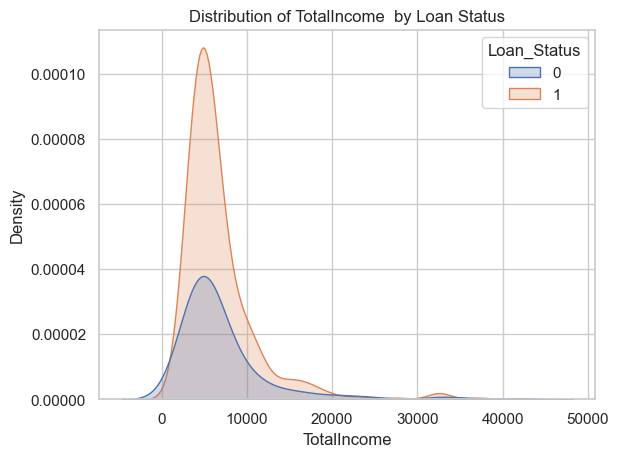

In [95]:
sns.kdeplot(data=d_train, x='TotalIncome', hue='Loan_Status', fill=True)
plt.title('Distribution of TotalIncome  by Loan Status')
plt.show()

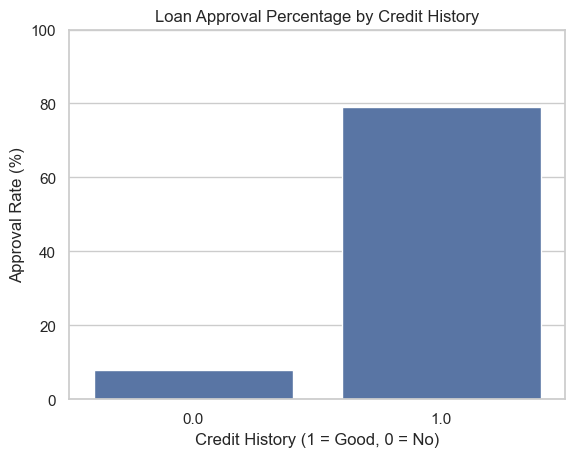

In [97]:
ct = pd.crosstab(d_train['Credit_History'], d_train['Loan_Status'])

percentages = ct.div(ct.sum(axis=1), axis=0) * 100

percentages = percentages.reset_index()

# Rename columns for clarity
percentages.columns = ['Credit_History', 'Denied', 'Approved']

# Plotting approval rates
sns.barplot(x='Credit_History', y='Approved', data=percentages)
plt.title('Loan Approval Percentage by Credit History')
plt.ylabel('Approval Rate (%)')
plt.xlabel('Credit History (1 = Good, 0 = No)')
plt.ylim(0, 100)
plt.show()

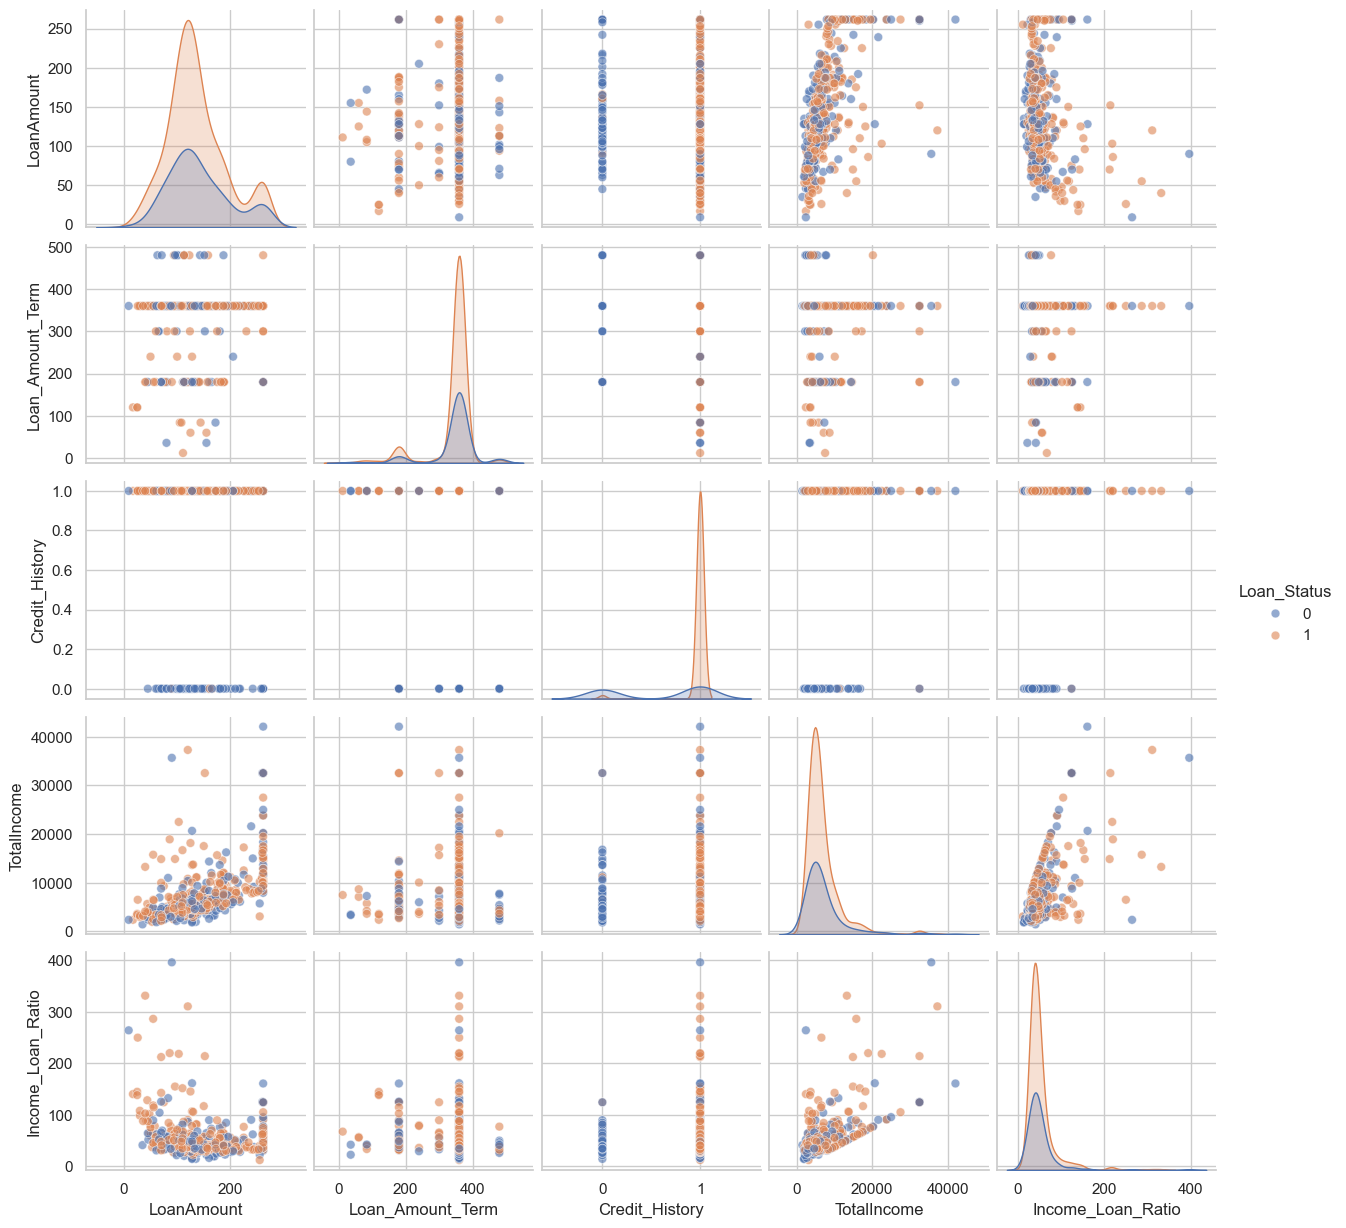

In [101]:
cols = [ 'LoanAmount', 'Loan_Amount_Term', 
        'Credit_History', 'TotalIncome', 'Income_Loan_Ratio']

sns.pairplot(d_train[cols + ['Loan_Status']], 
             hue='Loan_Status', 
             diag_kind='kde', 
             plot_kws={'alpha':0.6, 's':40})

plt.show()

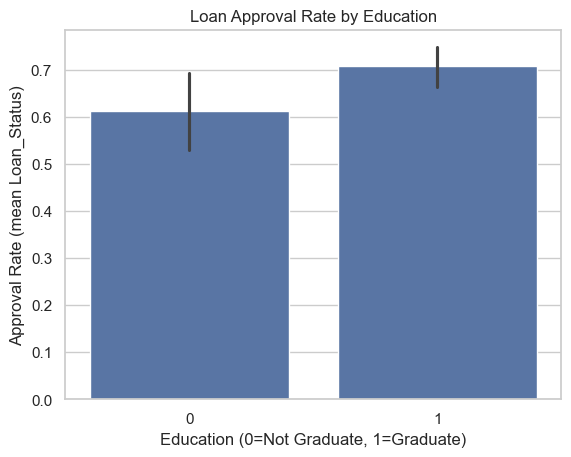

In [102]:
sns.barplot(x='Education', y='Loan_Status', data=d_train)
plt.title('Loan Approval Rate by Education')
plt.xlabel('Education (0=Not Graduate, 1=Graduate)')
plt.ylabel('Approval Rate (mean Loan_Status)')
plt.show()

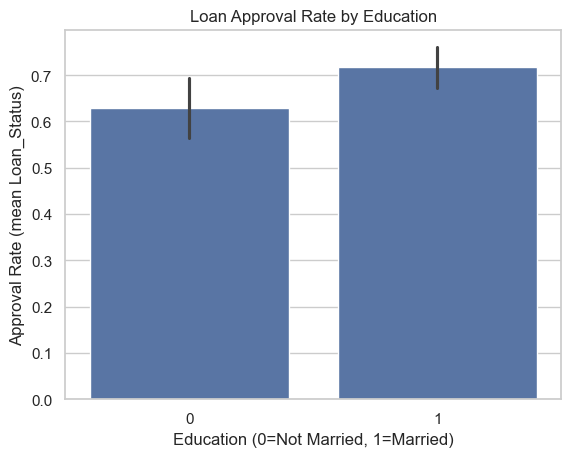

In [105]:
sns.barplot(x='Married', y='Loan_Status', data=d_train)
plt.title('Loan Approval Rate by Education')
plt.xlabel('Education (0=Not Married, 1=Married)')
plt.ylabel('Approval Rate (mean Loan_Status)')
plt.show()

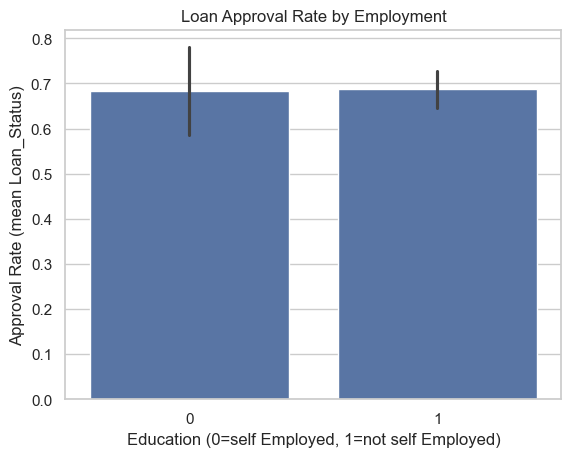

In [107]:
sns.barplot(x='Self_Employed', y='Loan_Status', data=d_train)
plt.title('Loan Approval Rate by Employment')
plt.xlabel('Education (0=self Employed, 1=not self Employed)')
plt.ylabel('Approval Rate (mean Loan_Status)')
plt.show()

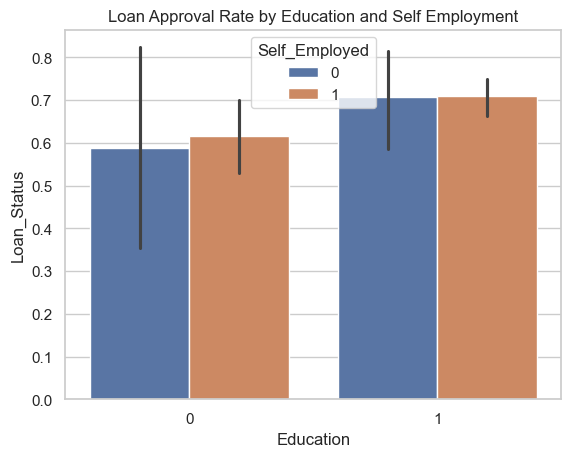

In [108]:
sns.barplot(x='Education', y='Loan_Status', hue='Self_Employed', data=d_train)
plt.title('Loan Approval Rate by Education and Self Employment')
plt.show()


In [119]:
# check every row has exactly one property flagged
cols = ['Property_Rural','Property_Semiurban','Property_Urban']
sums_per_row = d_train[cols].sum(axis=1)
sums_per_row.value_counts()
# ideally you see: 1 -> number_of_rows


1    614
Name: count, dtype: int64

In [120]:
accepted = d_train[d_train['Loan_Status'] == 1]
accepted_counts = {
    'Rural': int(accepted['Property_Rural'].sum()),
    'Semiurban': int(accepted['Property_Semiurban'].sum()),
    'Urban': int(accepted['Property_Urban'].sum())
}

total_counts = {
    'Rural': int(d_train['Property_Rural'].sum()),
    'Semiurban': int(d_train['Property_Semiurban'].sum()),
    'Urban': int(d_train['Property_Urban'].sum())
}

accepted_counts, total_counts


({'Rural': 110, 'Semiurban': 179, 'Urban': 133},
 {'Rural': 179, 'Semiurban': 233, 'Urban': 202})

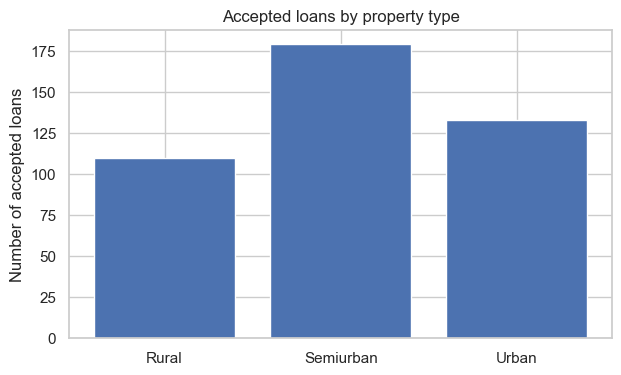

In [121]:

fig, ax = plt.subplots(figsize=(7,4))
types = ['Rural','Semiurban','Urban']
counts = [accepted_counts[t] for t in types]
ax.bar(types, counts)
ax.set_ylabel('Number of accepted loans')
ax.set_title('Accepted loans by property type')
plt.show()


In [124]:
from scipy.stats import chi2_contingency
contingency = pd.DataFrame({
    'Accepted': [110, 179, 133],
    'Rejected': [179-110, 233-179, 202-133]
}, index=['Rural', 'Semiurban', 'Urban'])

chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi2={chi2:.2f}, p-value={p:.4f}")

Chi2=12.30, p-value=0.0021


In [126]:
d_train['income_ratio'] = (d_train['ApplicantIncome'] + 0.00001) / (d_train['CoapplicantIncome'] + 0.0001)
print(d_train['income_ratio'])

0      5.849000e+07
1      3.039124e+00
2      3.000000e+07
3      1.095420e+00
4      6.000000e+07
           ...     
609    2.900000e+07
610    4.106000e+07
611    3.363332e+01
612    7.583000e+07
613    4.583000e+07
Name: income_ratio, Length: 614, dtype: float64


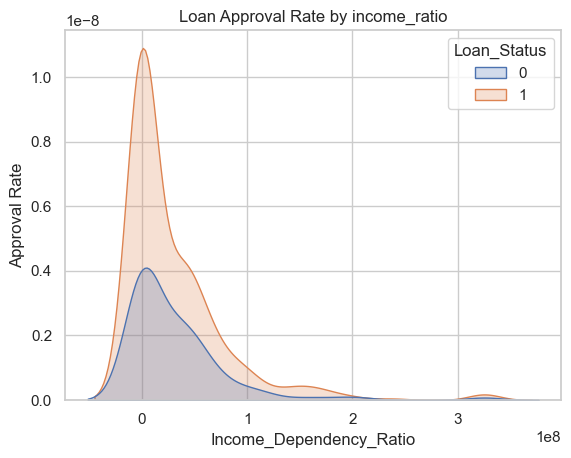

In [136]:
sns.kdeplot( data = d_train,  x = 'income_ratio' ,hue = 'Loan_Status' ,fill = 'true') 
plt.title('Loan Approval Rate by income_ratio')
plt.xlabel('Income_Dependency_Ratio')
plt.ylabel('Approval Rate')
plt.show()


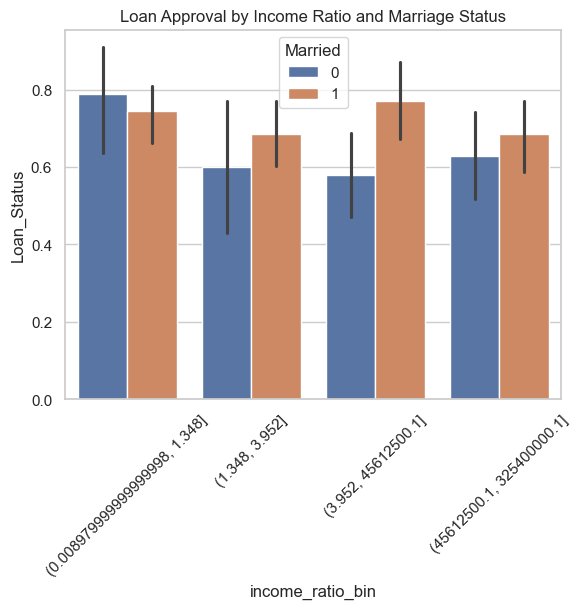

In [138]:
d_train['income_ratio_bin'] = pd.qcut(d_train['income_ratio'], q=4)

sns.barplot(x='income_ratio_bin', y='Loan_Status', hue='Married', data=d_train)
plt.xticks(rotation=45)
plt.title('Loan Approval by Income Ratio and Marriage Status')
plt.show()


In [171]:
y = d_train['Loan_Status']  
d_train.drop('income_ratio_bin', axis= 1)
X = d_train.drop(columns=['Loan_ID', 'Loan_Status', 'income_ratio_bin']) 

In [172]:
print(y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


In [175]:
X.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Income_Loan_Ratio,Property_Rural,Property_Semiurban,Property_Urban,income_ratio,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,1,0,1,1,5849,0.0,128.0,360.0,1.0,5849.0,45.695312,0,0,1,5.849000e+07,True,False,False,False
1,1,1,1,1,4583,1508.0,128.0,360.0,1.0,6091.0,47.585937,1,0,0,3.039124e+00,False,True,False,False
2,1,1,1,0,3000,0.0,66.0,360.0,1.0,3000.0,45.454545,0,0,1,3.000000e+07,True,False,False,False
3,1,1,0,1,2583,2358.0,120.0,360.0,1.0,4941.0,41.175000,0,0,1,1.095420e+00,True,False,False,False
4,1,0,1,1,6000,0.0,141.0,360.0,1.0,6000.0,42.553191,0,0,1,6.000000e+07,True,False,False,False


In [176]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [177]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [184]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [185]:

# Logistic Regression predictions and evaluation
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Decision Tree predictions and evaluation
y_pred_dtree = dtree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))


Logistic Regression Accuracy: 0.6991869918699187
              precision    recall  f1-score   support

           0       1.00      0.03      0.05        38
           1       0.70      1.00      0.82        85

    accuracy                           0.70       123
   macro avg       0.85      0.51      0.44       123
weighted avg       0.79      0.70      0.58       123

Decision Tree Accuracy: 0.7398373983739838
              precision    recall  f1-score   support

           0       0.57      0.66      0.61        38
           1       0.84      0.78      0.80        85

    accuracy                           0.74       123
   macro avg       0.70      0.72      0.71       123
weighted avg       0.75      0.74      0.74       123



In [201]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [191]:
xgb = XGBClassifier( eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [192]:
# Predict probabilities for positive class (1)
rf_probs = rf.predict_proba(X_test)[:, 1]
xgb_probs = xgb.predict_proba(X_test)[:, 1]

# Calculate AUC scores
rf_auc = roc_auc_score(y_test, rf_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

print(f"Random Forest AUC: {rf_auc:.3f}")
print(f"XGBoost AUC: {xgb_auc:.3f}")


Random Forest AUC: 0.858
XGBoost AUC: 0.854


In [197]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7,9, 10,12,15,17,20],
    'n_estimators': [30,50,70, 100,130, 150,170,200]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)


{'max_depth': 17, 'n_estimators': 170}
0.7649133837454095


In [194]:
# Model
rf = RandomForestClassifier(random_state=42)

# Grid of hyperparameters
param_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': [50, 100, 200]
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',  # optimize for AUC
    cv=5,               # 5-fold cross-validation
    n_jobs=-1           # use all CPU cores
)

grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best AUC:", grid_search.best_score_)

Best params: {'max_depth': 15, 'n_estimators': 100}
Best AUC: 0.7532930933567457


In [202]:
probs = rf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score to evaluate performance
auc = roc_auc_score(y_test, probs)
print("Test AUC:", auc)

Test AUC: 0.858359133126935


In [208]:
import joblib

# Assume your model is in a variable called "model"
joblib.dump(rf, "rf.pkl")


['rf.pkl']

In [205]:
# in Jupyter, after training
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# Example: create pipeline and train (if you haven't)
pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)
pipe.fit(X_train, y_train)

# Save pipeline (this includes preprocessing + model)
joblib.dump(pipe, "model.pkl")


['model.pkl']

In [209]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

class IncomeFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.copy()
        X['TotalIncome'] = X['ApplicantIncome'] + X['CoapplicantIncome']
        # avoid division by zero
        X['Income_Loan_Ratio'] = X['TotalIncome'] / np.where(X['LoanAmount']==0, 1.0, X['LoanAmount'])
        return X

In [211]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import joblib

# Define raw column lists (must match your raw DataFrame column names)
num_raw = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]
cat_raw = ["Gender","Married","Education","Self_Employed","Dependents","Property_Area"]

# numeric and categorical preprocessing pipelines
num_transform = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])
cat_transform = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")), ("onehot", OneHotEncoder(handle_unknown="ignore"))])

# ColumnTransformer — note we include the engineered columns in the numeric block AFTER IncomeFeatures runs
preprocessor = ColumnTransformer([
    ("num", num_transform, num_raw + ["TotalIncome", "Income_Loan_Ratio"]),
    ("cat", cat_transform, cat_raw)
])

pipe = Pipeline([
    ("feat", IncomeFeatures()),    # adds TotalIncome & Income_Loan_Ratio to the DataFrame
    ("pre", preprocessor),         # applies imputer/scaler and one-hot on raw+engineered features
    ("clf", RandomForestClassifier(random_state=42))
])

# IMPORTANT: X_train_raw must be your original raw DataFrame with columns in num_raw + cat_raw
pipe.fit(d_train, y_train)

# Save to a path your backend will load. E.g., if your backend folder is ../backend, use that path
joblib.dump(pipe, "model.pkl")   # or joblib.dump(pipe, "../backend/model.pkl")
print("Saved model.pkl")

ValueError: A given column is not a column of the dataframe